# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [33]:
y, X = patsy.dmatrices('tip  ~ sex + smoker + time + net_bill + 1', tips)

In [70]:
modelo_1 = sm.OLS(y,X).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.45
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           3.16e-13
Time:                        14:38:30   Log-Likelihood:                -105.91
No. Observations:                 244   AIC:                             221.8
Df Residuals:                     239   BIC:                             239.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2888      0.080    -16.032      0.000      -1.447      -1.130
sex[T.Female]      0.0168      0.052      0.323      0.747      -0.085       0.119
smoker[T.No]      -0.0055      0.050     -0.110      0.912      -0.104       0.093
time[T.Dinner]     0.0171      0.056      0.307      0.759      -0.093       0.127
net_bill          -0.0259      0.003     -8.371      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.301   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.688
Skew:                           0.650   Prob(JB):                     1.82e-56
Kurtosis:                       7.854   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
modelo_1 = smf.ols('tip  ~ net_bill + 1', data=tips).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           5.02e-23
Time:                        14:39:28   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
tips['res_1'] = modelo_1.resid

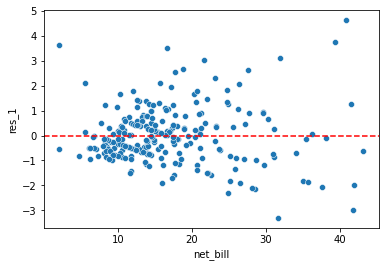

In [50]:
sns.scatterplot(x = 'net_bill', y = 'res_1', data = tips)
plt.axhline(y=0, color='r', linestyle='--');

In [51]:
modelo_2 = smf.ols('tip  ~ np.log(net_bill) + 1', data=tips).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           4.40e-20
Time:                        14:28:22   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
tips['log_net_bill'] = np.log(tips['net_bill'])

In [53]:
tips['res_2'] = modelo_2.resid

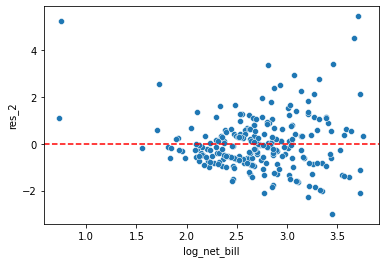

In [54]:
sns.scatterplot(x = 'log_net_bill', y = 'res_2', data = tips)
plt.axhline(y=0, color='r', linestyle='--');

In [55]:
modelo_3 = smf.ols('tip  ~ np.power(net_bill, 2) + 1', data=tips).fit()
modelo_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           1.47e-20
Time:                        14:30:29   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
tips['power_net_bill'] = np.power(tips['net_bill'], 2)

In [57]:
tips['res_3'] = modelo_3.resid

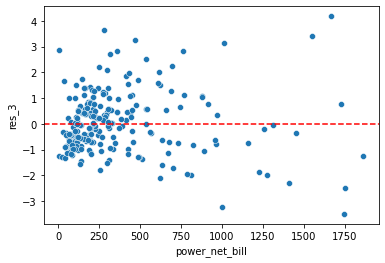

In [58]:
sns.scatterplot(x = 'power_net_bill', y = 'res_3', data = tips)
plt.axhline(y=0, color='r', linestyle='--');

In [120]:
tips['pred'] = modelo_3.fittedvalues
tips[['pred', 'tip']].corr().iloc[0,1]**2

0.3007320013293903

### Pelo gráfico observa-se que o padrão formado pela variável net_bill com potencia é mais adequado que o padrão formado pelo logaritmo de net_bill, que forma um cone. 

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip_pct```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [99]:
y, X = patsy.dmatrices('np.log(tip_pct)  ~ sex + smoker + time + net_bill + 1', data = tips[tips['tip_pct'] < 0.5])

In [100]:
modelo_4 = sm.OLS(y,X).fit()
modelo_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     17.48
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           1.38e-12
Time:                        15:04:20   Log-Likelihood:                -80.880
No. Observations:                 242   AIC:                             171.8
Df Residuals:                     237   BIC:                             189.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3700      0.074    -18.620      0.000      -1.515      -1.225
sex[T.Female]      0.0216      0.047      0.457      0.648      -0.071       0.115
smoker[T.No]       0.0359      0.046      0.787      0.432      -0.054       0.126
time[T.Dinner]    -0.0107      0.051     -0.211      0.833      -0.111       0.089
net_bill          -0.0224      0.003     -7.862      0.000      -0.028      -0.017
==============================================================================
Omnibus:                        7.672   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.077
Skew:                          -0.331   Prob(JB):                       0.0176
Kurtosis:                       3.602   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
modelo_4 = smf.ols('np.log(tip_pct)  ~ net_bill + 1', data = tips[tips['tip_pct'] < 0.5]).fit()
modelo_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           5.70e-15
Time:                        15:04:32   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.000      -1.439      -1.237
net_bill      -0.0229      0.003     -8.344      0.000      -0.028      -0.018
==============================================================================
Omnibus:                        8.210   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.483
Skew:                          -0.362   Prob(JB):                       0.0144
Kurtosis:                       3.563   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
tips['res_log'] = modelo_4.resid

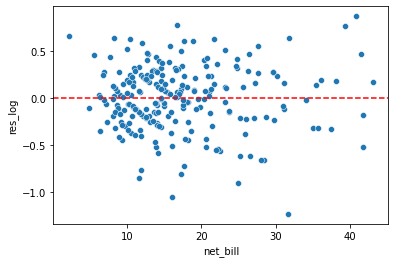

In [103]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips[tips['tip_pct'] < 0.5])
plt.axhline(y=0, color='r', linestyle='--');

In [104]:
modelo_5 = smf.ols('np.log(tip_pct) ~ np.log(net_bill) + 1', data = tips[tips['tip_pct'] < 0.5]).fit()
modelo_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           2.65e-15
Time:                        15:04:52   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131     -4.780      0.000      -0.887      -0.370
np.log(net_bill)    -0.4027      0.048     -8.460      0.000      -0.496      -0.309
==============================================================================
Omnibus:                        8.926   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.019
Skew:                          -0.406   Prob(JB):                       0.0110
Kurtosis:                       3.485   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
tips['res_5_log'] = modelo_5.resid

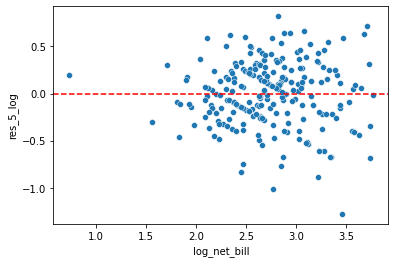

In [106]:
sns.scatterplot(x = 'log_net_bill', y = 'res_5_log', data = tips[tips['tip_pct'] < 0.5])
plt.axhline(y=0, color='r', linestyle='--');

In [115]:
modelo_6 = smf.ols('np.log(tip_pct) ~ np.power(net_bill, 2) + 1', data = tips[tips['tip_pct'] < 0.5]).fit()
modelo_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     58.47
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           4.97e-13
Time:                        15:45:09   Log-Likelihood:                -85.787
No. Observations:                 242   AIC:                             175.6
Df Residuals:                     240   BIC:                             182.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.5574      0.031    -49.796      0.000      -1.619      -1.496
np.power(net_bill, 2)    -0.0005    6.3e-05     -7.646      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        9.917   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.353
Skew:                          -0.368   Prob(JB):                      0.00343
Kurtosis:                       3.764   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
tips['res_6_log'] = modelo_6.resid

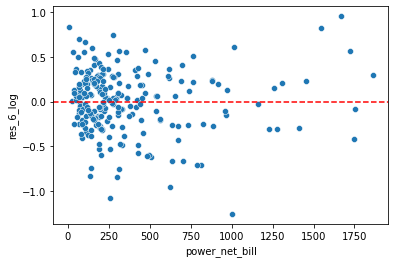

In [117]:
sns.scatterplot(x = 'power_net_bill', y = 'res_6_log', data = tips[tips['tip_pct'] < 0.5])
plt.axhline(y=0, color='r', linestyle='--');

### Os resíduos do modelo com a variável resposta percentual da gorjeta apresentou um melhor padrão quando a variável net_bill foi transformada por polinômio.

In [121]:
tips['pred_y'] = np.exp(modelo_6.fittedvalues)
tips[['pred_y', 'tip_pct']].corr().iloc[0,1]**2

0.17038040012113134

### O modelo 1 explica 30% da variabilidade enquanto o modelo 6 explica apenas 17%.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [124]:
df = pd.read_csv('banco.csv', sep=',')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [140]:
amostra = df.sample(1000)
amostra.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,res
6735,6735,2015-07-01,10775,F,False,False,0,Assalariado,Secundário,Casado,Casa,38,7.104110,2.0,False,1944.23,-2722.670852
7238,7238,2015-08-01,13683,F,False,True,0,Assalariado,Superior incompleto,Solteiro,Casa,50,19.967123,1.0,False,3585.63,-4726.016744
1403,1403,2015-02-01,10140,F,False,True,0,Assalariado,Secundário,Casado,Casa,46,4.049315,2.0,False,1458.49,-2342.832221
9837,9837,2015-10-01,12799,F,True,True,2,Empresário,Secundário,Casado,Casa,33,3.786301,4.0,False,2987.24,-739.557066
11721,11721,2015-12-01,1101,F,True,True,1,Servidor público,Superior completo,Viúvo,Casa,49,1.164384,2.0,False,1653.17,-1330.704420


In [145]:
modelo_pr = smf.ols('renda ~ tempo_emprego', data = amostra).fit()
print(modelo_pr.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           7.27e-38
Time:                        16:25:53   Log-Likelihood:                -8102.4
No. Observations:                 825   AIC:                         1.621e+04
Df Residuals:                     823   BIC:                         1.622e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2517.6056    232.835     10.813

In [142]:
amostra['res'] = modelo_pr.resid

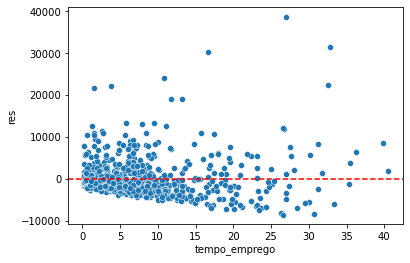

In [143]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = amostra)
plt.axhline(y=0, color='r', linestyle='--');

In [149]:
modelo_pr_1 = smf.ols('np.log(renda) ~ np.log(tempo_emprego)', data = amostra).fit()
print(modelo_pr_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     89.23
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           3.53e-20
Time:                        16:28:25   Log-Likelihood:                -964.76
No. Observations:                 825   AIC:                             1934.
Df Residuals:                     823   BIC:                             1943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.74

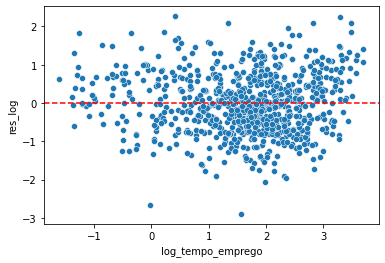

In [151]:
amostra['res_log'] = modelo_pr_1.resid
amostra['log_tempo_emprego'] = np.log(amostra['tempo_emprego'])
sns.scatterplot(x = 'log_tempo_emprego', y = 'res_log', data = amostra)
plt.axhline(y=0, color='r', linestyle='--');

### Obteve-se um resultado ok, fazendo a transformação log tanto da variável resposta (renda) como da variável explicativa (tempo_emprego)

In [152]:
amostra.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda', 'res', 'log_tempo_emprego',
       'res_log'],
      dtype='object')

In [154]:
modelo_pr_2 = smf.ols('''np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao +
                         estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia''',
                      data = amostra).fit()
modelo_pr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     12.30
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           4.16e-39
Time:                        16:36:41   Log-Likelihood:                -882.46
No. Observations:                 825   AIC:                             1813.
Df Residuals:                     801   BIC:                             1926.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.1763      1.087      6.605      0.000       5.044       9.309
sexo[T.M]                            0.5164      0.059      8.717      0.000       0.400       0.633
posse_de_veiculo[T.True]            -0.0389      0.058     -0.674      0.501      -0.152       0.074
posse_de_imovel[T.True]              0.0015      0.055      0.027      0.978      -0.107       0.110
tipo_renda[T.Empresário]             0.1552      0.056      2.761      0.006       0.045       0.265
tipo_renda[T.Pensionista]            1.0068      0.722      1.394      0.164      -0.411       2.425
tipo_renda[T.Servidor público]      -0.0907      0.095     -0.953      0.341      -0.277       0.096
educacao[T.Pós graduação]            1.5484      0.780      1.986      0.047       0.018       3.079
educacao[T.Secundário]              -0.2691      0.300     -0.897      0.370      -0.858       0.320
educacao[T.Superior completo]       -0.2256      0.302     -0.748      0.455      -0.818       0.367
educacao[T.Superior incompleto]     -0.3188      0.320     -0.996      0.319      -0.947       0.309
estado_civil[T.Separado]             0.0349      0.525      0.066      0.947      -0.996       1.065
estado_civil[T.Solteiro]             0.1539      0.515      0.299      0.765      -0.857       1.165
estado_civil[T.União]               -0.1204      0.097     -1.247      0.213      -0.310       0.069
estado_civil[T.Viúvo]                0.0876      0.530      0.165      0.869      -0.952       1.127
tipo_residencia[T.Casa]              0.0533      0.230      0.232      0.817      -0.399       0.505
tipo_residencia[T.Com os pais]      -0.0642      0.258     -0.249      0.804      -0.571       0.442
tipo_residencia[T.Comunitário]       0.5171      0.428      1.208      0.228      -0.323       1.357
tipo_residencia[T.Estúdio]           0.3239      0.348      0.930      0.353      -0.360       1.008
tipo_residencia[T.Governamental]     0.0160      0.294      0.055      0.956      -0.560       0.592
qtd_filhos                          -0.1314      0.509     -0.258      0.796      -1.130       0.867
idade                                0.0055      0.003      1.743      0.082      -0.001       0.012
tempo_emprego                        0.0512      0.004     12.921      0.000       0.043       0.059
qt_pessoas_residencia                0.1703      0.508      0.335      0.738      -0.828       1.168
==============================================================================
Omnibus:                        1.138   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                0.992
Skew:                           0.044   Prob(JB):                        0.609
Kurtosis:                       3.145   

In [175]:
modelo_pr_2 = smf.ols('np.log(renda) ~ sexo + tempo_emprego ', data = amostra).fit()
modelo_pr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           3.91e-48
Time:                        16:55:48   Log-Likelihood:                -897.66
No. Observations:                 825   AIC:                             1801.
Df Residuals:                     822   BIC:                             1815.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.5705      0.044    171.918      0.000       7.484       7.657
sexo[T.M]         0.5019      0.054      9.370      0.000       0.397       0.607
tempo_emprego     0.0516      0.004     14.114      0.000       0.044       0.059
==============================================================================
Omnibus:                        0.699   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.628
Skew:                           0.066   Prob(JB):                        0.731
Kurtosis:                       3.032   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

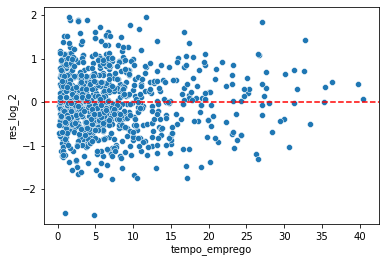

In [176]:
amostra['res_log_2'] = modelo_pr_2.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res_log_2', data = amostra)
plt.axhline(y=0, color='r', linestyle='--');

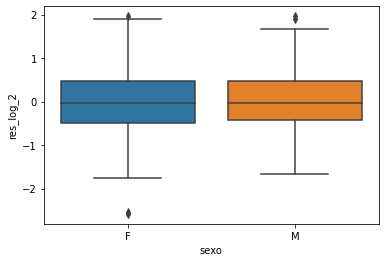

In [169]:
sns.boxplot(x = 'sexo', y = 'res_log_2', data = amostra);

In [172]:
amostra['renda_log'] = np.log(amostra['renda'])
amostra['pred'] = modelo_pr_2.fittedvalues
amostra[['pred', 'renda_log']].corr().iloc[0,1]**2

0.2332537012837675

### O modelo de regressão multipla obteve um valor de R² de 0,233 ou seja ele consegue explicar 23% da variabilidade dos dados. O gráfico do residuos apresentam um padrão de cone. Talvez uma transformção de box-cox fosse uma melhor escolha.